### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [4]:
using LinearAlgebra, CSV, Tables, DataFrames, Statistics, Plots

function mult_scal(a, b)
    dot(a, b)
end

function mult_matrix(M, v)
    M * v
end

mult_matrix (generic function with 1 method)

In [52]:
arr = zeros(Float64, (500, 3))

for dim in 1:50
    for i in 1:10
        a = rand(Float64, dim * 80)
        b = rand(Float64, dim * 80)
        scal = @elapsed mult_scal(a, b)
        v = rand(Float64, dim * 80)
        M = rand(Float64, (dim * 80, dim * 80))
        mat = @elapsed mult_matrix(M, v)
        arr[(dim - 1) * 10 + i, 1] = dim * 80
        arr[(dim - 1) * 10 + i, 2] = scal
        arr[(dim - 1) * 10 + i, 3] = mat
    end
end

CSV.write("times.csv", Tables.table(arr))
        

"times.csv"

In [53]:
input = "times.csv"
times = CSV.read(input, delim=",", DataFrame)
rename!(times, :Column1 => :size, :Column2 => :scal, :Column3 => :matrix)

,size,scal,matrix
,Float64,Float64,Float64
1,80.0,2.8e-6,2.8e-6
2,80.0,3.0e-7,1.5e-6
3,80.0,1.0e-7,1.0e-6
4,80.0,0.0,8.0e-7
5,80.0,0.0,8.0e-7
6,80.0,1.0e-7,8.0e-7
7,80.0,1.0e-7,1.2e-6
8,80.0,1.0e-7,1.0e-6
9,80.0,1.0e-7,1.3e-6


In [54]:
grouped = groupby(times, :1)

,size,scal,matrix
,Float64,Float64,Float64
1,80.0,2.8e-6,2.8e-6
2,80.0,3.0e-7,1.5e-6
3,80.0,1.0e-7,1.0e-6
4,80.0,0.0,8.0e-7
5,80.0,0.0,8.0e-7
6,80.0,1.0e-7,8.0e-7
7,80.0,1.0e-7,1.2e-6
8,80.0,1.0e-7,1.0e-6
9,80.0,1.0e-7,1.3e-6


In [50]:
combined = combine(grouped, "scal" => mean, "matrix" => mean, "scal" => std, "matrix" => std)

,size,scal_mean,matrix_mean,scal_std,matrix_std
,Float64,Float64,Float64,Float64,Float64
1,50.0,3.0e-7,6.3e-7,7.74597e-7,5.57873e-7
2,100.0,6.7e-7,0.00012079,2.35938e-7,6.24101e-5
3,150.0,4.8e-7,5.291e-5,3.45768e-7,7.52617e-6
4,200.0,7.6e-7,9.429e-5,3.50238e-7,2.342e-5
5,250.0,4.4e-7,8.384e-5,8.43274e-8,2.52878e-5
6,300.0,4.7e-7,6.414e-5,1.33749e-7,9.67818e-6
7,350.0,6.8e-7,8.14e-5,3.19026e-7,5.29591e-6
8,400.0,5.8e-7,9.114e-5,1.75119e-7,5.09078e-6
9,450.0,5.5e-7,9.711e-5,2.41523e-7,8.30869e-6


In [56]:
DataFrames.last(combined, 30)

,size,scal_mean,matrix_mean,scal_std,matrix_std
,Float64,Float64,Float64,Float64,Float64
1,1050.0,2.03e-6,0.0006359,4.66786e-7,6.01676e-5
2,1100.0,2.2e-6,0.00067099,5.12076e-7,6.28838e-5
3,1150.0,1.9e-6,0.00076508,1.24722e-7,0.000105807
4,1200.0,2.07e-6,0.00075691,2.94581e-7,4.7152e-5
5,1250.0,2.27e-6,0.00083611,4.11096e-7,5.69542e-5
6,1300.0,2.08e-6,0.00090475,1.75119e-7,4.69154e-5
7,1350.0,2.36e-6,0.00092507,4.0332e-7,4.60015e-5
8,1400.0,2.22e-6,0.00097773,3.08401e-7,5.57643e-5
9,1450.0,2.22e-6,0.00101147,2.52982e-7,2.46453e-5


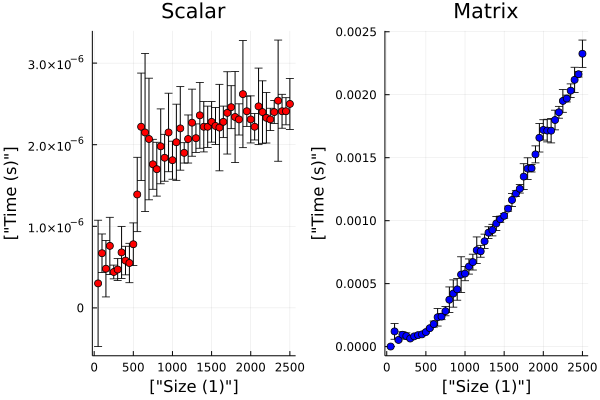

In [55]:
scatter(combined.size, [combined.scal_mean, combined.matrix_mean], colour = [:red :blue], 
    yerror = [combined.scal_std combined.matrix_std], layout = (1, 2), draw_arrow=true, 
    title = ["Scalar" "Matrix"], xlabel = ["Size (1)"], ylabel = ["Time (s)"], 
    legend = false)